# Dynamic Programming

## 1. Dynamic Programming & Grid World

### 1.1. Recap : MDP

MDP is a **discrete time stochastic process**. 

An **MDP** is a 5-tuple $(\mathcal{S},\mathcal{A},\mathcal{P}_a,\mathcal{R}_a,\gamma)$.

**That is**, $(S_1,A_1,\mathcal{P}^{a_1}_{s_1 s'},\mathcal{R}^{a_1}_{s_1},\gamma)$, $(S_2,A_2,\mathcal{P}^{a_2}_{s_2 s'},\mathcal{R}^{a_2}_{s_2},\gamma)$, $(S_3,A_3,\mathcal{P}^{a_3}_{s_3 s'},\mathcal{R}^{a_3}_{s_3},\gamma)$, $\cdots$ until the **stopping time $\tau$**.

1. **State** ($S \in \mathcal{S}$)

2. **Action** ($A \in \mathcal{A}$)

    - $A_s$ is the finite set of actions available from state

3. **(State) Transition Probability** ($\mathcal{P}_a$)

    - $\mathcal{P}^a_{ss'} = Pr[S_{t+1} = s' \mid S_t = s, A_t = a]$ 
    
    - the probability that action $a$ in state $s$ at time $t$ will lead to state $s'$ at time $(t+1)$.

4. **Reward Function** ($\mathcal{R}^a_s$)

    - $\mathcal{R}^a_s = \mathbb{E}[R_{t+1} \mid S_t = s, A_t = a]$

    - the expected immediate reward received after transitioning from state $s$ to state $s'$, due to action $a$
    
5. **Discount Factor** ($\gamma$)

    - it represents the difference in importance between future rewards and present rewards.

    - used to avoid the problem of infinite return ($G_t = R_{t+1} + \gamma R_{t+1} + \cdots = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$)
    
### 1.2. A Sequential Decision Making Problem : MDP vs. Reality

**Example of "Street Dancing"**

1. **State**($S_t$) : a specific **posture** at time point $t$

2. **Action**($A_t$) : a specific **movement** at time point $t$

3. **Transition Probability**($P^{a_t}_{s_t s'}$) : the probability that **movement** $a_t$ from the **posture** $s_t$ will lead to the next **posture** $s'$.

4. **Reward Function**($R^{a_t}_{s_t}$) : the amount of **applause** from the crowd received from from the **posture** $s_t$ to $s'$, due to the **movement** $a_t$.

5. **Discount Factor** ($\gamma$) : the difference in importance between future **applause** and present **applause**.

(Note that **1,2,4** are the **random variables**)

|MDP|Reality
-|-|-
$\mathcal{S}$|known|known
$\mathcal{A}$|known|known
$\mathcal{P}$|**known beforehand**|**unknown**
$\mathcal{R}$|**known beforehand**|**unknown until observed**
$\gamma$|known|known

### 1.3. Dynamic Programming (DP)

**What is DP**?

+ A problem-solving paradigm, where the problem is **split into several sub-problems** and the **past solutions are reused**.

+ If sub-problems can be **nested recursively** inside larger problems, so that dynamic programming methods are applicable, then **there is a relation between the value of the larger problem and the values of the sub-problems**.

**Why DP**?

+ In order to effectively find the **target function**.

+ To solve the **recurrence formula** by dividing the problem into smaller processes

$$
v_0(s) \rightarrow v_1(s) \rightarrow \cdots \rightarrow v_k(s) \rightarrow \cdots \rightarrow v_{\pi}(s)
$$

**How to find the value function?**

+ **Value function** is the function of states that estimated how good it is for the agent to be in a given state.

+ The notion of "how good" is defined in terms of **expected return**.

+ Thus, we can adopt a **quick-and-dirty approach** using simulations.

### 1.4. Grid World Example (Quick-and-Dirty)

Let us assume a $3 \times 3$ grid world.

For simplicity, we can assume the following.

$$\mathcal{P}_a = 1,\mathcal{R}_a = 0, \text{ (in terminal, } \mathcal{R}_a = 1) ,\gamma=0.7$$

And we have **random policy**, which can be defined as

$$
\pi(a \mid s) = 0.25 \ \ \forall a
$$

Without DP, we still be able to **approximate $v$ function**. 

t=0 	S=(0, 0) 	A=up 	P=1 	R=0.0 	gamma=0.7
t=1 	S=(0, 0) 	A=east 	P=1 	R=0.0 	gamma=0.7
t=2 	S=(0, 1) 	A=west 	P=1 	R=0.0 	gamma=0.7
t=3 	S=(0, 0) 	A=west 	P=1 	R=0.0 	gamma=0.7
t=4 	S=(0, 0) 	A=down 	P=1 	R=0.0 	gamma=0.7
t=5 	S=(1, 0) 	A=up 	P=1 	R=0.0 	gamma=0.7
t=6 	S=(0, 0) 	A=west 	P=1 	R=0.0 	gamma=0.7
t=7 	S=(0, 0) 	A=down 	P=1 	R=0.0 	gamma=0.7
t=8 	S=(1, 0) 	A=west 	P=1 	R=0.0 	gamma=0.7
t=9 	S=(1, 0) 	A=west 	P=1 	R=0.0 	gamma=0.7
t=10 	S=(1, 0) 	A=east 	P=1 	R=0.0 	gamma=0.7
t=11 	S=(1, 1) 	A=east 	P=1 	R=0.0 	gamma=0.7
t=12 	S=(1, 2) 	A=down 	P=1 	R=0.0 	gamma=0.7
t=13 	S=(2, 2) 	 	 	R=1.0 	gamma=0.7


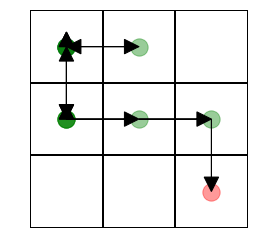

In [1]:
from DP import *

env = Env()
randomPolicy(env)

In [2]:
Simulator(env)

[[ 0.03170211  0.06388527  0.11233541]
 [ 0.06651981  0.15223633  0.28577732]
 [ 0.12016512  0.28573636  0.7       ]]


## 2. Dynamic Programming 1 : Policy Iteration

### 2.1. Flow of RL algorithms

**Equation**|**Algorithm**|
-|-
**Bellman Expectation Equation** | Policy iteration
**Bellman Optimality Equation** | Value iteration


### 2.2. Policy Iteration

+ **Policy** $\rightarrow$ **Policy Evaluation** $\rightarrow$ **Policy Improvement**

+ This iteration can make the policy to converge to the **optimal policy**.

### 2.3. Policy Evaluation

We can redefine **Bellman Expectation Equation** in a **recursive form**.

$$
\begin{aligned}
v_{\pi}(s) &= \mathbb{E}_{\pi}[G_t \mid S_t =s ] \\[10pt]
&= \mathbb{E}_{\pi}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots \mid S_t =s] \\[10pt]
&= \mathbb{E}_{\pi}[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t =s ] \\[10pt]
&= \mathbb{E}_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) \mid S_t =s ] \\[15pt]
\end{aligned}
$$

This can be further modified so that it can be **calculated**. Note **how $v$ is dependent upon $\pi$**.


$$
\begin{aligned}
v_{\pi}(s) &= \mathbb{E}_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) \mid S_t =s ] \\[15pt]
&= \sum_{a \in A} \pi (a \mid s) (R_{t+1} + \gamma v_{\pi}(s') ) ) \\[15pt]
v_{k+1}(s) &= \sum_{a \in A} \pi (a \mid s) (R^{a}_{s} + \gamma v_{k}(s') ) ) \\[15pt]
\end{aligned}
$$

### 2.4. Grid World Example (DP)

Using the above formula, we can **easily calculate the $v$ function**.

In [4]:
Bellman(env)

[[ 0.00133984  0.00765625  0.        ]
 [ 0.          0.04375     0.30274609]
 [ 0.04375     0.25        0.66830254]]


### 2.5. Policy Improvement

How can we improve our policy based on the **policy evaluation**?

We introduce **Greedy Policy Improvement**.

$$
\begin{aligned}
q_{\pi} (s,a) &= R^{a}_{s} + \gamma v_{\pi} (s') \\[15pt]
\pi'(s) &= argmax_{a \in A} q_{\pi} (s, a)
\end{aligned}
$$